$$\require{mhchem}$$       

- You are welcome to turn in work for the mechanism derivation on a separate sheet of paper for a small penalty (2 pt). Please do so by taking a photo of the pages and uploading them to the same Box folder.  Also hand in the physical sheet of paper.
- Label the x/y axis of graphs (and legend if appropriate)
- Comment your code so we understand what you're doing
- 'print' your identified solutions / fitted constants with units

# Reverse water gas shift catalysis

The reverse water gas shift reaction (rWGS) has been proposed as a way of turning waste CO$_2$ into carbon monoxide, which can be further hydrogenated to liquid fuels.  This reaction is as follows in the gas phase:
\begin{align}
\ce{CO2 + H2 <=> CO + H2O}
\end{align}
The reverse water gas shift reaction is usually conducted on CuO/ZnO catalysts supported by alumina, but a group in literature suggested that a TiO$_2$ supported Pt catalyst might be more active.  You're going to help them estimate a reduced mechanism for this catalytic reaction.

##  [20 pt] The authors propose the following associative elementary reaction mechanism: 
\begin{align*}
\ce{CO2(g) + S &<=>[K_{1}] CO2*S}\\
\ce{H2(g) + S &<=>[K_{2}] H2\cdot S}\\
\ce{CO2\cdot S + H2 \cdot S &<=>[K_{eq}] CO\cdot S + H2O \cdot S}\\
\ce{CO \cdot S &<=>[K_{4}] CO(g) + S}\\
\ce{H2O \cdot S &<=>[K_{5}] H2O(g) + S}
\end{align*}
Assuming that the third step ($\ce{CO2\cdot S + H2 \cdot S <=> CO\cdot S + H2O \cdot S\:}$) is rate limiting, derive the apparent reaction rate law for the this mechanism at short time conditions, where $[CO]$, $[H_2O]$, $[CO\cdot S]$, and $[H_2O\cdot S]$ are all ~0.  This is a heterogeneous catalytic process.

First, we assume that $r_1$ and $r_2$ are near equilibrium:
\begin{align*}
K_1=\frac{[CO2\cdot S]}{P_{CO2}[S]}  && K_2=\frac{[H2\cdot S]}{P_{H2}[S]}
\end{align*}
We then use a total site balance:
\begin{align*}
[S]_0=[S]+[CO2\cdot S]+[H2\cdot S]
\end{align*}
Substituting the two equilibria into this:
\begin{align*}
[S]_0&=[S]+K_1P_{CO2}[S]+K_2P_{H2}[S]\\
&=[S](1+K_1P_{CO2}+K_2P_{H2})\\
[S]&=\frac{[S]_0}{(1+K_1P_{CO2}+K_2P_{H2})}
\end{align*}
The rate equation for the rate limiting step is 
\begin{align*}
r_3&=k_3[CO2\cdot S][H2\cdot S]=k_3 K_1P_{CO2}[S]K_2P_{H2}[S]\\
r_3&=\frac{k_3 K_1K_2P_{CO2}P_{H2}S_0^2}{(1+K_1P_{CO2}+K_2P_{H2})^2}
\end{align*}

(also ok to write things in terms of [CO2] etc)

## [20 pt] We can assume simplified Langmuir Hinshelwood kinetics of the form: 
\begin{align*}
r=\frac{kP_{CO2}P_{H_2}}{(1+K_1P_{CO2}+K_2P_{H_2})^2}
\end{align*}
where $K_1$ is already known from other studies:  0.07/atm. Use this simplified Langmuir Hinshelwood rate law to fit values of $k$ and $K_2$ for the following data:

| $P_{CO_2}$[atm] | $P_{H_2}$[atm] | Rate [mol/h/gcat] |
|----------:|---------:|------------------:|
|       0.9 |     0.18 |              0.037 |
|       0.9 |     0.42 |              0.045 |
|       0.9 |      0.6 |              0.046 |
|       0.9 |     0.85 |              0.051 |
|       0.9 |     0.92 |             0.0525 |
In addition to finding $k,K_2$, also plot your fit with the data.

(array([ 0.37047447,  1.55420861]), array([[ 0.17455019,  0.56639874],
       [ 0.69793091,  2.41048632]]), array([ 0.06156405,  0.26906273]))


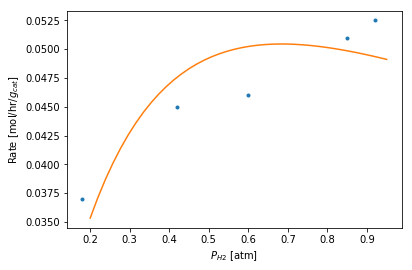

k=0.370, K2=1.554


In [1]:
from pycse.PYCSE import nlinfit
import matplotlib.pyplot as plt
import numpy as np
PCO2=[.9,.9,.9,.9,.9]
PH2=[.18,.42,.6,.85,.92]
rate=[.037,.045,.046,.051,.0525]
K1=0.07
def model(x,k,K2):
    PCO2=x[:,0]
    PH2=x[:,1]
    return k*PCO2*PH2/(1.+K1*PCO2+K2*PH2)**2.

sol=nlinfit(model,np.array(list(zip(PCO2,PH2))),rate,[.4,1.6])
print(sol)

params=sol[0]

Hrange=np.linspace(0.2,0.95,40)
CO2range=Hrange*0+0.9
plt.plot(PH2,rate,'.')
plt.plot(Hrange,model(np.array(list(zip(CO2range,Hrange))),params[0],params[1]))
plt.xlabel('$P_{H2}$ [atm]')
plt.ylabel('Rate [mol/hr/$g_{cat}$]')
plt.show()

print('k=%1.3f, K2=%1.3f'%(params[0],params[1]))

##  [15 pt] Now use the same data to fit a $k$ and $\alpha$ for a simple power law (below). 
\begin{align*}
r=k P_{CO}^{0.831}P_{H2}^\alpha
\end{align*}

(array([ 0.0576008 ,  0.20684185]), array([[ 0.0549334 ,  0.06026821],
       [ 0.14538446,  0.26829925]]), array([ 0.00083816,  0.01931137]))


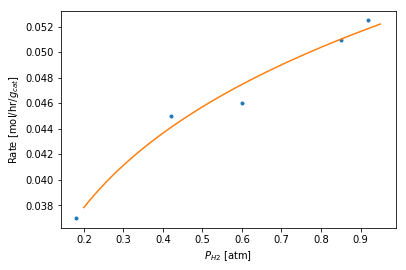

k=0.058, alpha=0.207


In [2]:
from pycse.PYCSE import nlinfit
import matplotlib.pyplot as plt
import numpy as np
PCO2=[.9,.9,.9,.9,.9]
PH2=[.18,.42,.6,.85,.92]
rate=[.037,.045,.046,.051,.0525]
K1=0.07
def model(x,k,alpha):
    PCO2=x[:,0]
    PH2=x[:,1]
    return k*PCO2**0.831*PH2**alpha

sol=nlinfit(model,np.array(list(zip(PCO2,PH2))),rate,[.4,1.6])
print(sol)

params=sol[0]

Hrange=np.linspace(0.2,0.95,40)
CO2range=Hrange*0+0.9
plt.plot(PH2,rate,'.')
plt.plot(Hrange,model(np.array(list(zip(CO2range,Hrange))),params[0],params[1]))
plt.xlabel('$P_{H2}$ [atm]')
plt.ylabel('Rate [mol/hr/$g_{cat}$]')
plt.show()

print('k=%1.3f, alpha=%1.3f'%(params[0],params[1]))

## [5 pt] Of the three rate laws (the one proposed in literature, the simplified Langmuir Hinshelwood, and the power law), which one would you use? Why? 

The first one is already Langmuir-Hinshelwood.  The power law fits the best.

## [40 pt] Under reverse water gas shift conditions, the experimental team found that  the experimental rate data could be approximated with
\begin{align}
r=k P_{CO2}^{0.831}P_{H2}^{0.201}
\end{align}
where $k=0.060$ [mol CO2 h$^{-1}$ $g_{cat}^{-1}$ atm$^{-1.032}$].  For simplicity, assume that there is only a forward rate of reaction (no reverse). Assuming a packed bed reactor with pressure drop ($\alpha=2\times 10^{-5}/g_{cat}$), plot the CO$_2$ and H$_2$ molar flow rates and the pressure profile for an inlet stream of 0.5 mol/s each of CO$_2$ and H$_2$ at a temperature of 573 K and a total pressure of 3.4 atm as a function of catalyst weight (up to 10,000 g). The reactor is isothermal and because the net change in mols for the reaction is 0, isobaric.

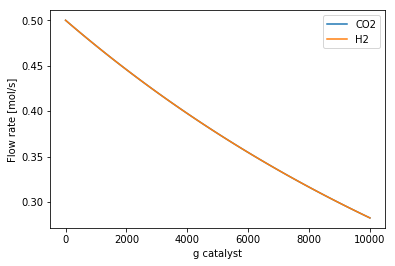

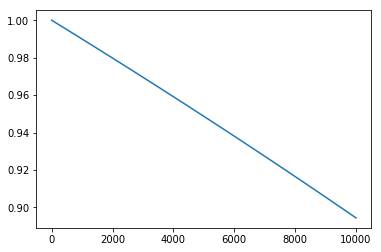

In [3]:
T=573 #K
P=3.4 #atm
alpha=2e-5 #/gcat
k=0.06
F0=0.5
def dFdW(F,W):
    FCO2,FH2,y=F
    PCO2=FCO2/F0*1.7
    PH2=FH2/F0*1.7
    r=k*PCO2**0.831*PH2**0.201/3600
    return [-r,-r,-alpha/2/y]

from scipy.integrate import odeint
Wrange=np.linspace(0,10000,100)
sol=odeint(dFdW,[0.5,0.5,1],Wrange)

plt.plot(Wrange,sol[:,0:2])
plt.xlabel('g catalyst')
plt.ylabel('Flow rate [mol/s]')
plt.legend(['CO2','H2'])
plt.show()
plt.plot(Wrange,sol[:,2])

plt.show()